In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
train_df = pd.read_csv("C:/Users/ching/Desktop/walmart_data/walmart_Train.csv")
#test_df = pd.read_csv("C:/Users/ching/Desktop/walmart_data/walmart_Test.csv")

In [29]:
train_df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [30]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [31]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [32]:
for cols in train_df.columns:
    print(cols, train_df[cols].nunique())

Item_Identifier 1559
Item_Weight 415
Item_Fat_Content 5
Item_Visibility 7880
Item_Type 16
Item_MRP 5938
Outlet_Identifier 10
Outlet_Establishment_Year 9
Outlet_Size 3
Outlet_Location_Type 3
Outlet_Type 4
Item_Outlet_Sales 3493


**欄位資料**
* Item_Identifier 產品編號／1559個產品
* Item_Weight 產品重量／415個重量 ==> 有空值 ok用平均數
* Item_Fat_Content 產品脂肪含量／5種值／非食用的脂肪含量應為另一類 ==> 要處理 ok
* Item_Visibility 產品上架可見度／7880個值 ==> 資料有0的值，用平均值來補 ok
* Item_Type 產品種類／16個種類
* Item_MRP 不同通路中產品種類中的最高價／5938個值
* Outlet_Identifier 通路編號／10間店
* Outlet_Establishment_Year 通路成立年份／9個成立年份
* Outlet_Size 通路面積大小／3個類別 ==> 有空值,將雜貨店及Out_Type1輸入為small，將Out_Type2及3輸入為medium ok
* Outlet_Location_Type 通路地點／在1.2.3級城市
* Outlet_Type 通路型態／雜貨店或是超市4種

**目標欄位Target Variable**
* Item_Outlet_Sales 產品銷售量／有3493個

**Data Types**
* Ordinal - Outlet_Location_Type, Outlet_Size, Outlet_Establishment_Year, Item_Fat_Content
* Numerical - Item_Outlet_Sales, Item_Weight, Item_Visibility, Item_MRP
* Categorical - Outlet_Type, Item_Type
* Nominal - Item_Identifier, Outlet_Identifier 

**Missing values** 
* Item_Weight
* Outlet_Size

# Train Data PREPROCESSING

In [33]:
# 處理Item_Fat_Content欄位
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].replace('reg', 'Regular')

In [34]:
# 處理Item_Fat_Content欄位, 新增欄位Item_Type_Category，分成Food，Drinks，Non-Consumable(非食用性商品)
train_df['Item_Type_Category'] = train_df['Item_Identifier'].apply(lambda x: x[0:2])
train_df['Item_Type_Category'] = train_df['Item_Type_Category'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
train_df['Item_Type_Category'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Category, dtype: int64

In [35]:
# 處理Item_Fat_Content欄位, 將Non-Consumable的改成Non-Edible
train_df.loc[train_df['Item_Type_Category']=='Non-Consumable','Item_Fat_Content'] = "Non-Edible"

In [36]:
# 處理通路面積大小的空值
for i in range(len(train_df)):
    if pd.isna(train_df.loc[i,'Outlet_Size']):
        if (train_df.loc[i,'Outlet_Type']=='Grocery Store') or (train_df.loc[i,'Outlet_Type']=='Supermarket Type1') :
            train_df.loc[i, 'Outlet_Size'] = 'Small'
        elif (train_df.loc[i,'Outlet_Type']=='Supermarket Type2') or (train_df.loc[i,'Outlet_Type']=='Supermarket Type3') :
            train_df.loc[i, 'Outlet_Size'] = 'Medium'

In [37]:
# 處理Item_Weight的空值，用平均數
Item_Type_Mean = train_df.pivot_table(columns='Item_Type', values='Item_Weight', aggfunc=lambda x:x.mean())
Item_Type_Mean

Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Item_Weight,12.277108,11.346936,12.768202,12.305705,13.426069,12.867061,13.224769,11.400328,13.142314,13.384736,12.817344,13.853285,12.552843,12.98788,11.84746,13.690731


In [38]:
for i in range(len(train_df)):
    if pd.isna(train_df.loc[i, 'Item_Weight']):
        item = train_df.loc[i, 'Item_Type']
        train_df.at[i, 'Item_Weight'] = Item_Type_Mean[item]

In [39]:
# 處理Item_Visibility的空值，用Item_Type的平均數
Item_Visibility_Mean = train_df[['Item_Type', 'Item_Visibility']].groupby(['Item_Type'], as_index=False).mean()
Item_Visibility_Mean.columns

Index(['Item_Type', 'Item_Visibility'], dtype='object')

In [41]:
for i in range(len(train_df)):
    if train_df.loc[i, 'Item_Visibility']==0:
        cat =  train_df.loc[i, 'Item_Type']
        m = Item_Visibility_Mean.loc[Item_Visibility_Mean['Item_Type'] == cat]['Item_Visibility']
        train_df.at[i, 'Item_Visibility'] = m

In [42]:
# 新增成立年數欄位
train_df['Operation_Years'] = 2020-train_df['Outlet_Establishment_Year']

In [43]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_Type_Category         8523 non-null   object 
 13  Operation_Years            8523 non-null   int64

In [44]:
train_df.nunique()

Item_Identifier              1559
Item_Weight                   431
Item_Fat_Content                3
Item_Visibility              7895
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
Item_Type_Category              3
Operation_Years                 9
dtype: int64

In [45]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Category,Operation_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,21
3,FDX07,19.20,Regular,0.068513,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,22
4,NCD19,8.93,Non-Edible,0.061322,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,33


In [46]:
#存成csv
Result ='C:/Users/ching/Desktop/walmart_data/preprocess/train_df_pre.csv'
train_df.to_csv(Result, index=True )
print( '成功產出'+ Result)

成功產出C:/Users/ching/Desktop/walmart_data/preprocess/train_df_pre.csv


**tebleau練習**
https://public.tableau.com/profile/ching6735#!/vizhome/walmart_sales/walmart_
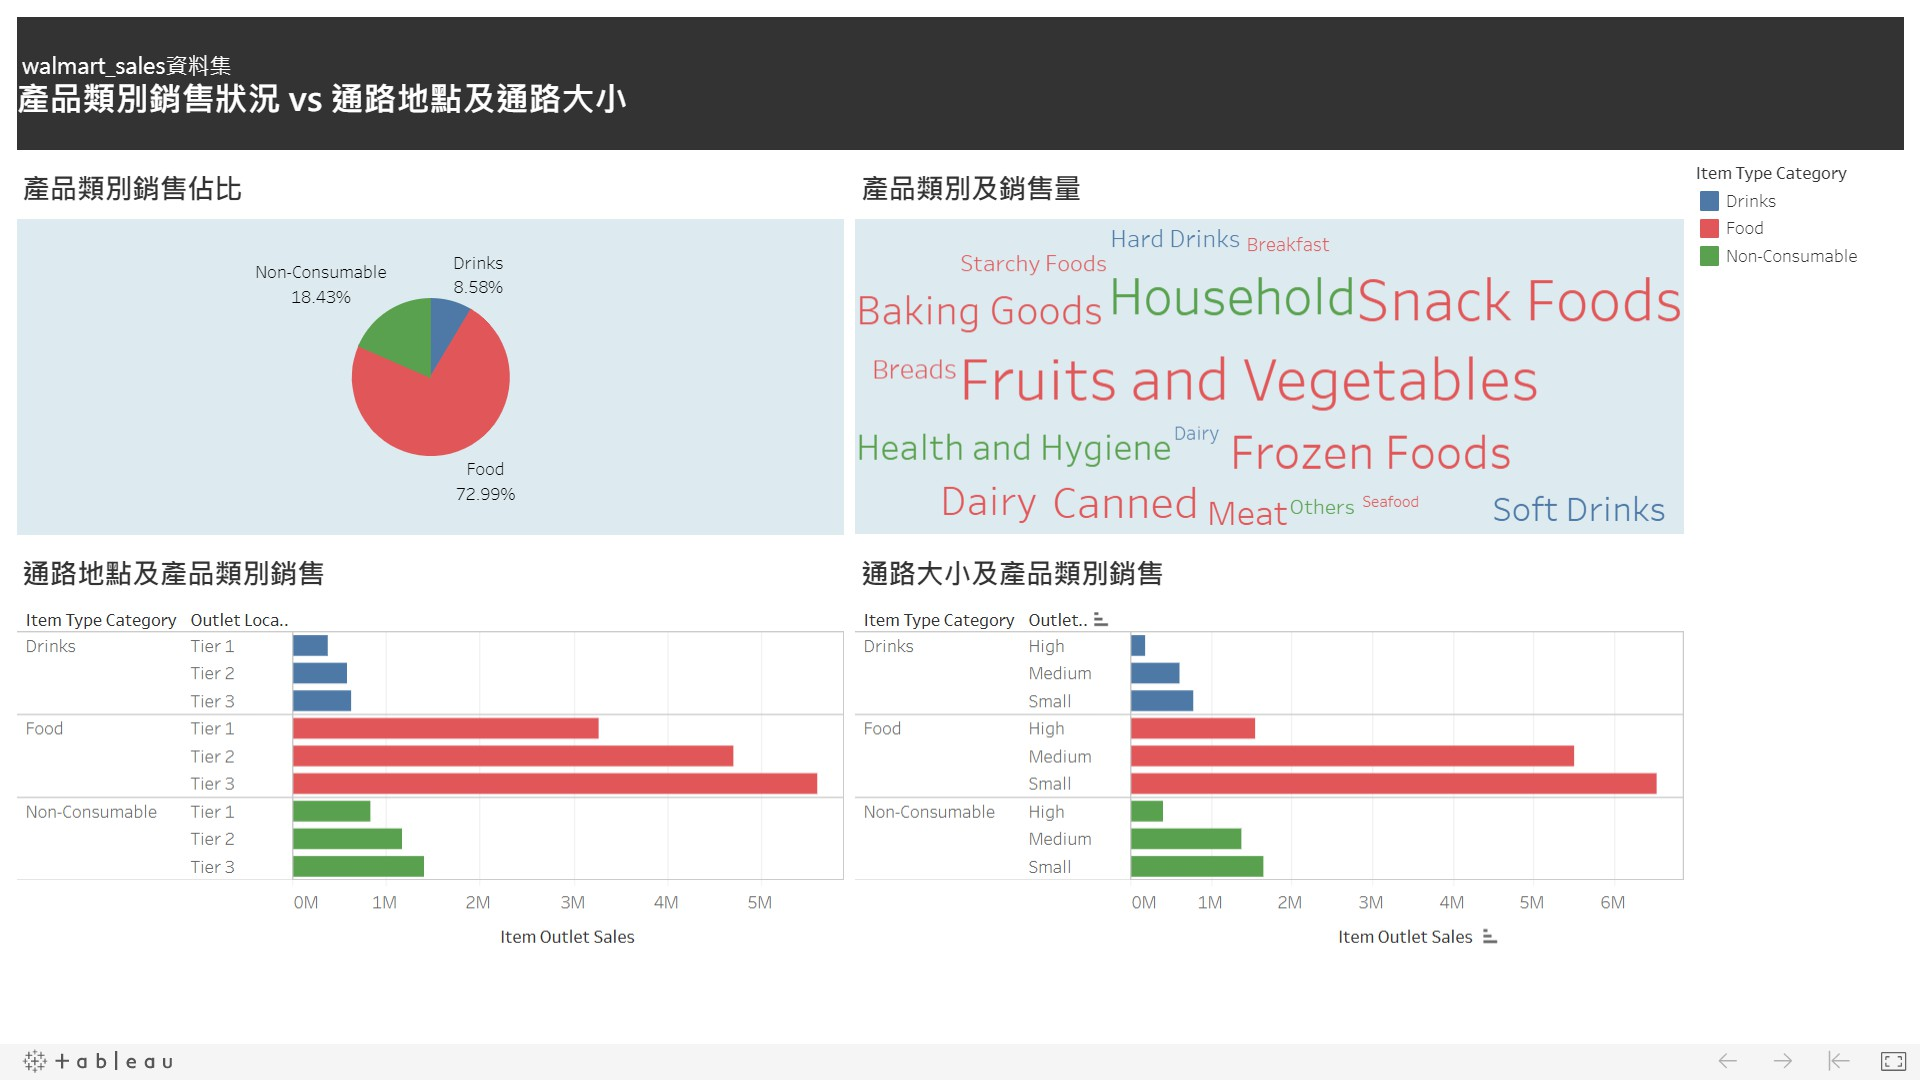